In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
pip install ipython-autotime

In [ ]:
%load_ext autotime

time: 90.2 µs (started: 2022-02-21 18:29:35 +00:00)


In [ ]:
from keras.models import load_model
import pandas as pd
 
# load model
model = load_model('drive/MyDrive/NoteBook/Test_Train_Val/model_Def_best_2102.h5')
class_df_T = pd.read_csv('drive/MyDrive/NoteBook/Test_Train_Val/class_df_T.csv')  
df_test = pd.read_csv('drive/MyDrive/NoteBook/Test_Train_Val/df_test.csv')


/usr/local/lib/python3.7/dist-packages/keras/layers/core/lambda_layer.py:305: UserWarning: keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  'function_type')


time: 27.3 s (started: 2022-02-21 18:29:35 +00:00)


In [ ]:
from tqdm import tqdm
import os
import cv2
import numpy as np

image_location = 'drive/MyDrive/NoteBook/Test_Train_Val/test'

file_list=os.listdir(image_location)  # list of files
len(file_list)

5853

time: 462 ms (started: 2022-02-21 18:30:03 +00:00)


In [ ]:
lst_pred = []

for f in tqdm(file_list): # iterate through the files in the directory list
    try:
      f_path=os.path.join(image_location, f)  # create the path to the image file
      img=cv2.imread(f_path)    # read in the image - note cv2 reads in images in BGR format
      img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # model was trained on RGB images so convert to RGB
      img=cv2.resize(img, (128,128)) # model was trained on images of size 128  X 128 X 3 so resize the images
      img=img/255 # model was trained with pixel value scalled between -1 to +1 so convert the pixel range    
      img=np.expand_dims(img, axis=0) # model predict expects the input to have dimension (batch_size, width, height, bands)
      prediction =model.predict (img, batch_size=1, verbose=0) # make predictions    
      pred=np.argmax(prediction)# find the index of the column with the highest probability
      pred_1 = str(class_df_T.loc[class_df_T['ref_idx'] == pred]["race"][pred])
      #print ('for file ', f_path, '/ Predicted ---> ', pred_1 , ' / Idx ---> ' , pred, ' / Proba----> ', prediction[0][pred]  )
      lst_pred.append([f_path, pred_1, pred,prediction[0][pred] ])
      #print('--')
    except:
      continue

100%|██████████| 5853/5853 [16:04<00:00,  6.07it/s]

time: 16min 4s (started: 2022-02-21 18:30:03 +00:00)


In [ ]:
lst_pred_df = pd.DataFrame(lst_pred)
lst_pred_df[0] = lst_pred_df[0].astype('string')
lst_pred_df = lst_pred_df.rename(columns={0: "path", 1:"Cat_prob",2: "Idx", 3:"Proba"})

lst_pred_df[['C0', 'C1','C2','C3','C4', 'File_name']] = lst_pred_df['path'].str.split('/', expand=True)
lst_pred_df.pop('C0')
lst_pred_df.pop('C1')
lst_pred_df.pop('C2')
lst_pred_df.pop('C3')
lst_pred_df.pop('C4')


lst_pred_df

,path,Cat_prob,Idx,Proba,File_name
0,drive/MyDrive/NoteBook/Test_Train_Val/test/n02...,Norwich_terrier,46,0.840514,n02094114_3172.jpg
1,drive/MyDrive/NoteBook/Test_Train_Val/test/n02...,Maltese_dog,41,1.000000,n02085936_4797.jpg
2,drive/MyDrive/NoteBook/Test_Train_Val/test/n02...,soft,106,0.999889,n02105505_2465.jpg
3,drive/MyDrive/NoteBook/Test_Train_Val/test/n02...,Dandie_Dinmont,17,0.535068,n02085936_10447.jpg
4,drive/MyDrive/NoteBook/Test_Train_Val/test/n02...,standard_poodle,107,0.999381,n02113799_6730.jpg
...,...,...,...,...,...
5848,drive/MyDrive/NoteBook/Test_Train_Val/test/n02...,bull_mastiff,78,0.999813,n02108422_2867.jpg
5849,drive/MyDrive/NoteBook/Test_Train_Val/test/n02...,Norwich_terrier,46,0.828647,n02100583_2885.jpg
5850,drive/MyDrive/NoteBook/Test_Train_Val/test/n02...,cairn,79,0.999997,n02096177_5117.jpg
5851,drive/MyDrive/NoteBook/Test_Train_Val/test/n02...,Labrador_retriever,38,1.000000,n02099712_4133.jpg


time: 84.2 ms (started: 2022-02-21 18:46:08 +00:00)


In [ ]:
df_test_for_comp = df_test[['File_name', 'Category']]
reunion_df1 = lst_pred_df[['Cat_prob', 'Proba', 'File_name']]
reunion_df2 = df_test_for_comp.copy()
result = pd.merge(reunion_df1, reunion_df2, on="File_name")
result

,Cat_prob,Proba,File_name,Category
0,Norwich_terrier,0.840514,n02094114_3172.jpg,Norfolk_terrier
1,Maltese_dog,1.000000,n02085936_4797.jpg,Maltese_dog
2,soft,0.999889,n02105505_2465.jpg,komondor
3,Dandie_Dinmont,0.535068,n02085936_10447.jpg,Maltese_dog
4,standard_poodle,0.999381,n02113799_6730.jpg,standard_poodle
...,...,...,...,...
5848,bull_mastiff,0.999813,n02108422_2867.jpg,bull_mastiff
5849,Norwich_terrier,0.828647,n02100583_2885.jpg,vizsla
5850,cairn,0.999997,n02096177_5117.jpg,cairn
5851,Labrador_retriever,1.000000,n02099712_4133.jpg,Labrador_retriever


time: 51.3 ms (started: 2022-02-21 18:46:08 +00:00)


In [ ]:
df_test_for_comp = df_test[['File_name', 'Category']]

reunion_df1 = lst_pred_df[['Cat_prob', 'Proba', 'File_name']]
reunion_df2 = df_test_for_comp.copy()

result = pd.merge(reunion_df1, reunion_df2, on="File_name")
result

,Cat_prob,Proba,File_name,Category
0,Norwich_terrier,0.840514,n02094114_3172.jpg,Norfolk_terrier
1,Maltese_dog,1.000000,n02085936_4797.jpg,Maltese_dog
2,soft,0.999889,n02105505_2465.jpg,komondor
3,Dandie_Dinmont,0.535068,n02085936_10447.jpg,Maltese_dog
4,standard_poodle,0.999381,n02113799_6730.jpg,standard_poodle
...,...,...,...,...
5848,bull_mastiff,0.999813,n02108422_2867.jpg,bull_mastiff
5849,Norwich_terrier,0.828647,n02100583_2885.jpg,vizsla
5850,cairn,0.999997,n02096177_5117.jpg,cairn
5851,Labrador_retriever,1.000000,n02099712_4133.jpg,Labrador_retriever


time: 41.5 ms (started: 2022-02-21 18:46:08 +00:00)


In [ ]:
# Creer la liste race a partir de class_df_T
lst_r = class_df_T.race
list_race = lst_r.tolist()

time: 10.7 ms (started: 2022-02-21 18:50:35 +00:00)


In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def Thresold_finder(x, result, list_race):
  print(" --- THRESHOLD : ", x , "---")
  print("")
  resultxx = result.copy()
  print("df Before : " , resultxx.shape)
  resultxx = resultxx[resultxx.Proba > x]
  print("df After : ", resultxx.shape)
  print("")
  y_true = resultxx.Cat_prob
  y_pred = resultxx.Category
  print ( 'Acc Général : ' , accuracy_score(y_true, y_pred))
  print("")
  print(classification_report(y_true, y_pred, target_names=list_race))
  print("")
  cf_matrix = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(30,30)) 
  sns.heatmap(cf_matrix, annot=False,  ax=ax)

time: 158 ms (started: 2022-02-21 18:52:11 +00:00)


 --- THRESHOLD :  0.99 ---

df Before :  (5853, 4)
df After :  (3227, 4)

Acc Général :  0.7551905794855903

                                precision    recall  f1-score   support

                  Afghan_hound       0.77      0.97      0.86        31
           African_hunting_dog       0.98      0.98      0.98        57
                      Airedale       0.68      0.71      0.70        21
American_Staffordshire_terrier       0.82      0.55      0.65        33
                   Appenzeller       0.39      0.80      0.52        15
            Australian_terrier       0.28      1.00      0.44         7
            Bedlington_terrier       0.86      0.94      0.90        34
          Bernese_mountain_dog       0.89      0.84      0.87        58
              Blenheim_spaniel       0.91      0.81      0.86        48
                 Border_collie       0.64      0.69      0.67        13
                Border_terrier       0.79      0.82      0.81        33
                   Boston_

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


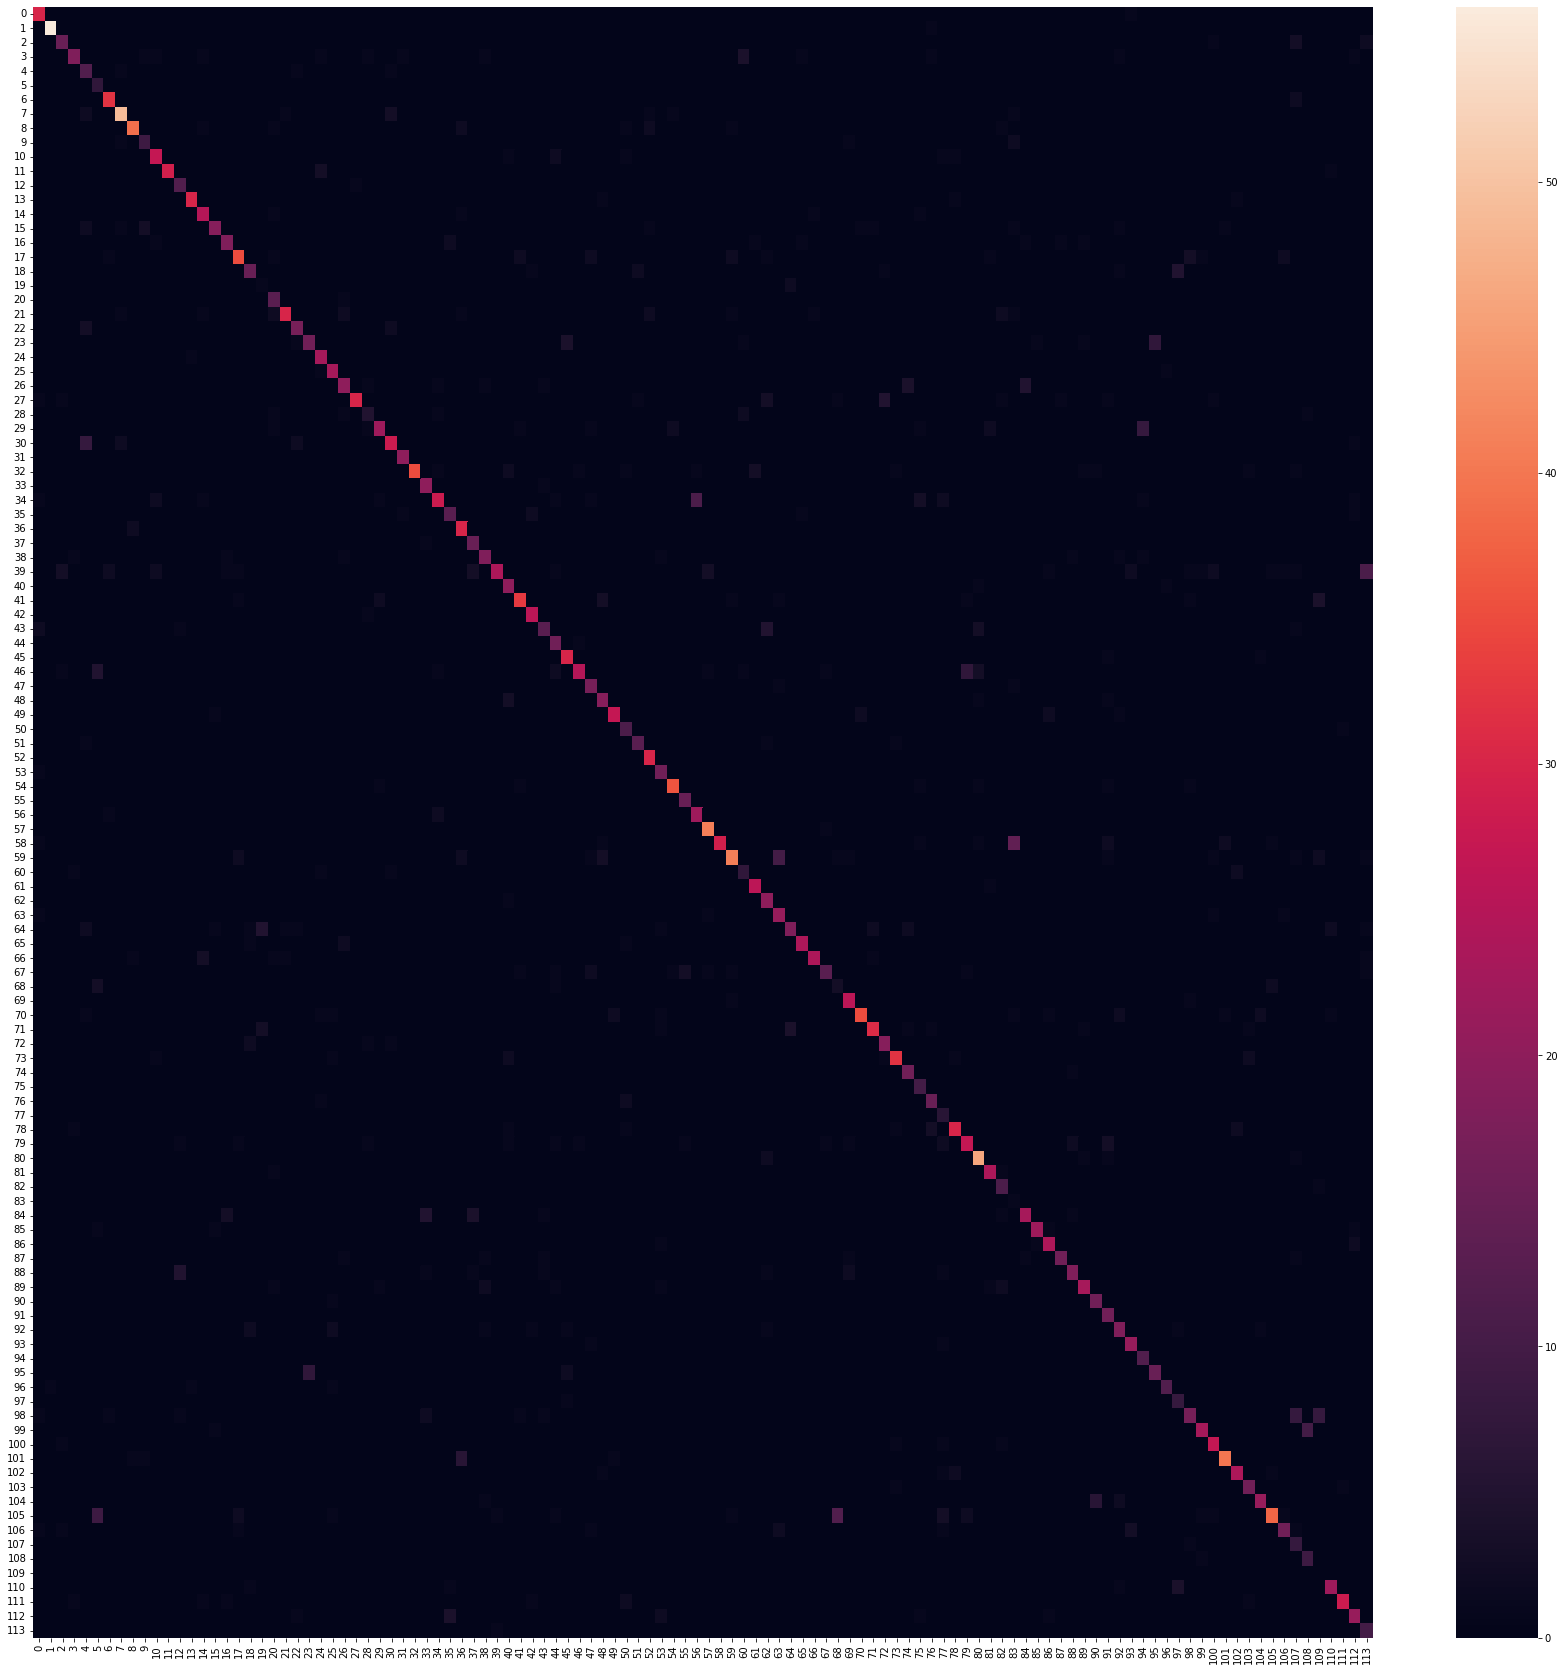

time: 6.4 s (started: 2022-02-21 18:52:12 +00:00)


In [ ]:
Thresold_finder(0.99, result, list_race)

 --- THRESHOLD :  0.95 ---

df Before :  (5853, 4)
df After :  (3815, 4)

Acc Général :  0.6975098296199214

                                precision    recall  f1-score   support

                  Afghan_hound       0.75      0.94      0.84        35
           African_hunting_dog       0.98      0.98      0.98        58
                      Airedale       0.62      0.77      0.69        26
American_Staffordshire_terrier       0.67      0.50      0.57        40
                   Appenzeller       0.33      0.75      0.46        16
            Australian_terrier       0.18      1.00      0.31         7
            Bedlington_terrier       0.82      0.94      0.88        34
          Bernese_mountain_dog       0.86      0.79      0.83        63
              Blenheim_spaniel       0.83      0.81      0.82        54
                 Border_collie       0.57      0.68      0.62        19
                Border_terrier       0.77      0.77      0.77        35
                   Boston_

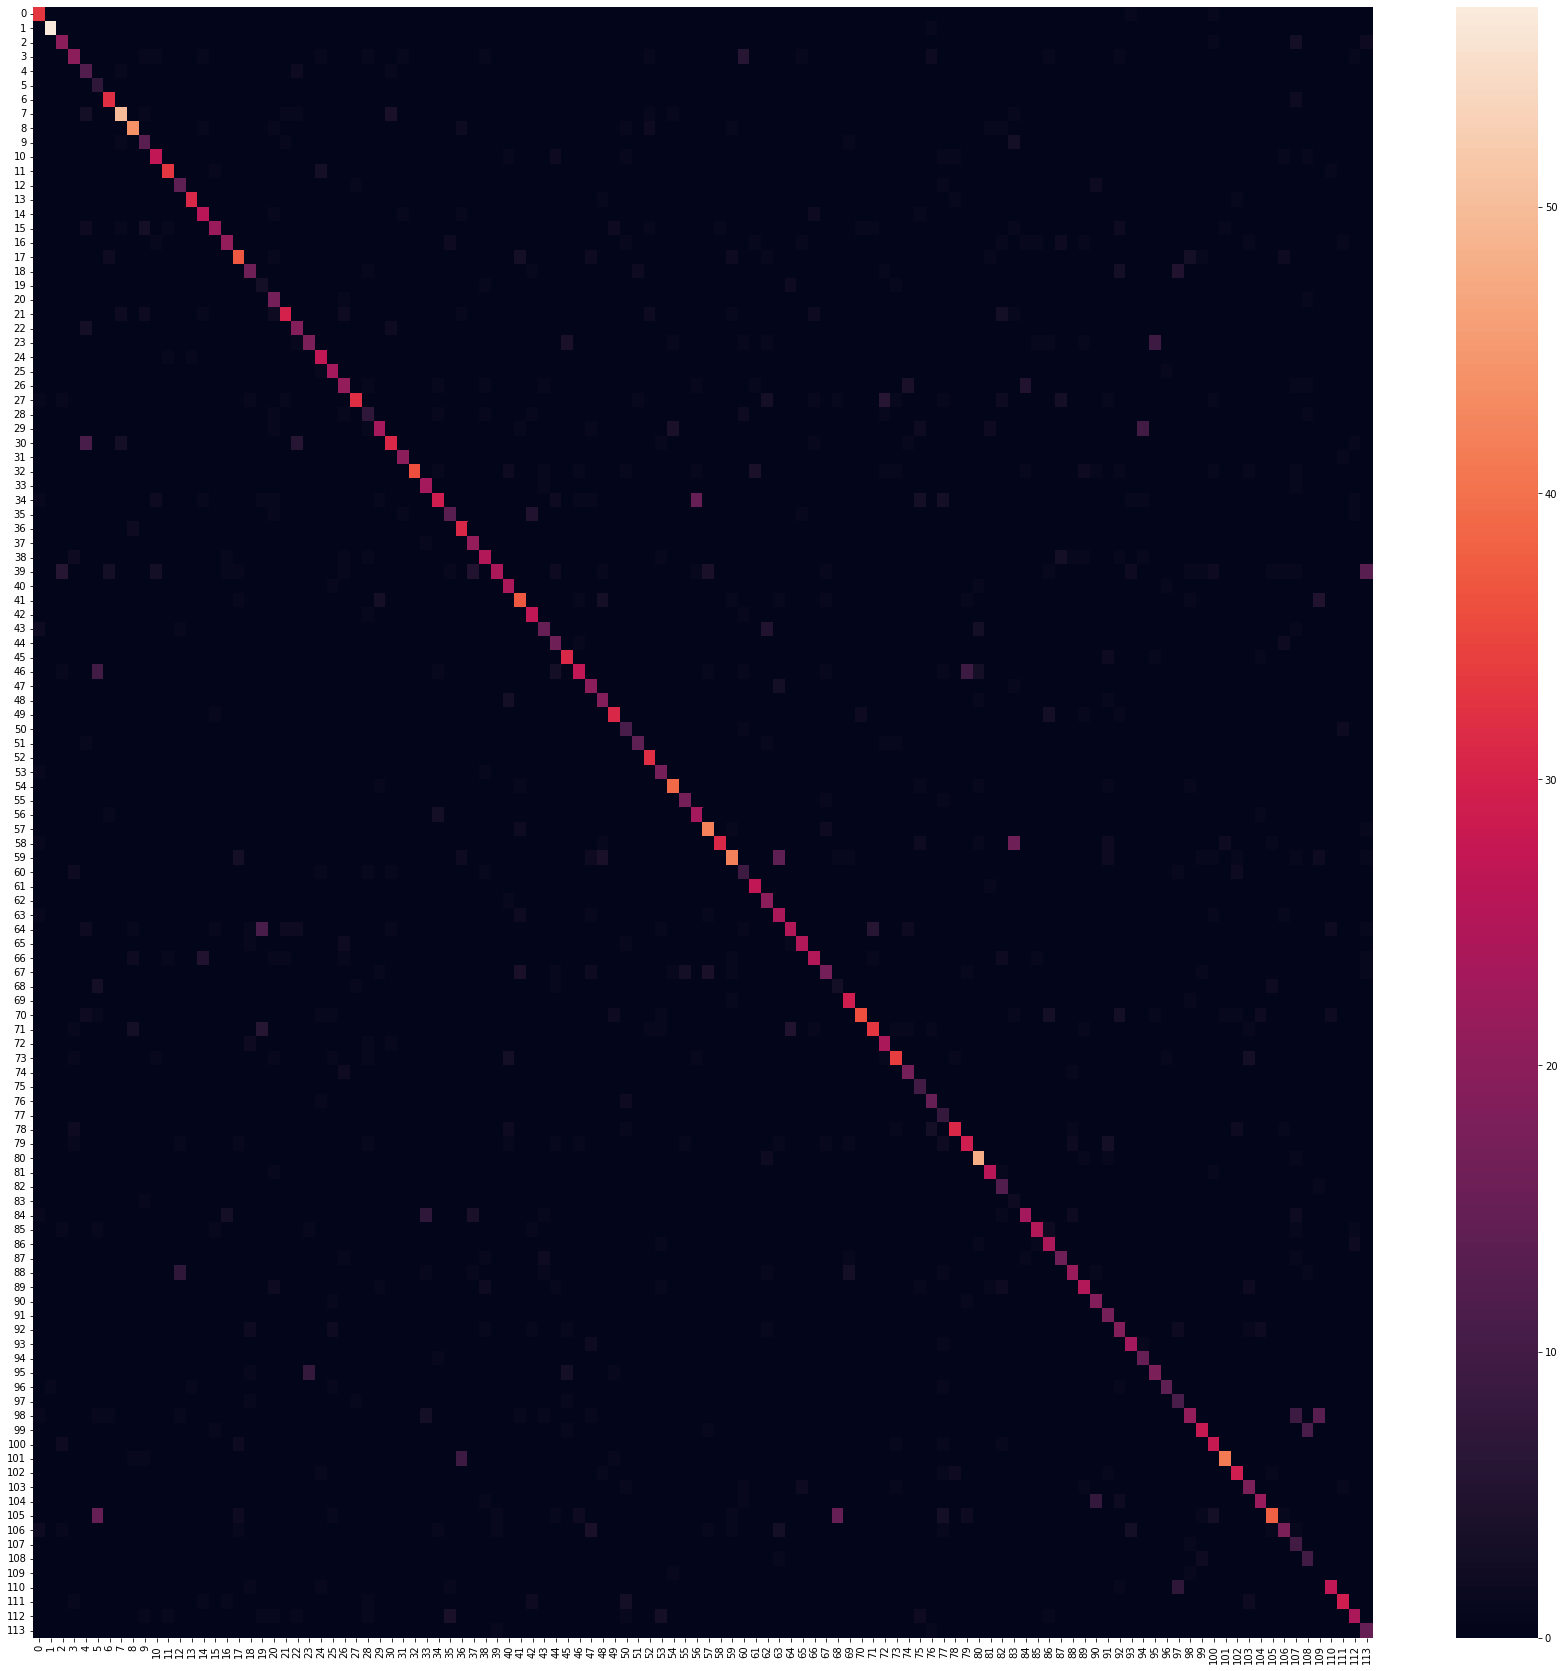

time: 3.9 s (started: 2022-02-21 18:53:06 +00:00)


In [ ]:
Thresold_finder(0.95, result, list_race)

 --- THRESHOLD :  0.9 ---

df Before :  (5853, 4)
df After :  (4131, 4)

Acc Général :  0.6710239651416122

                                precision    recall  f1-score   support

                  Afghan_hound       0.71      0.92      0.80        38
           African_hunting_dog       0.98      0.95      0.97        61
                      Airedale       0.52      0.73      0.61        30
American_Staffordshire_terrier       0.68      0.47      0.55        45
                   Appenzeller       0.31      0.71      0.43        17
            Australian_terrier       0.17      0.88      0.29         8
            Bedlington_terrier       0.78      0.94      0.85        34
          Bernese_mountain_dog       0.85      0.77      0.81        65
              Blenheim_spaniel       0.80      0.79      0.79        56
                 Border_collie       0.66      0.70      0.68        27
                Border_terrier       0.75      0.75      0.75        36
                   Boston_b

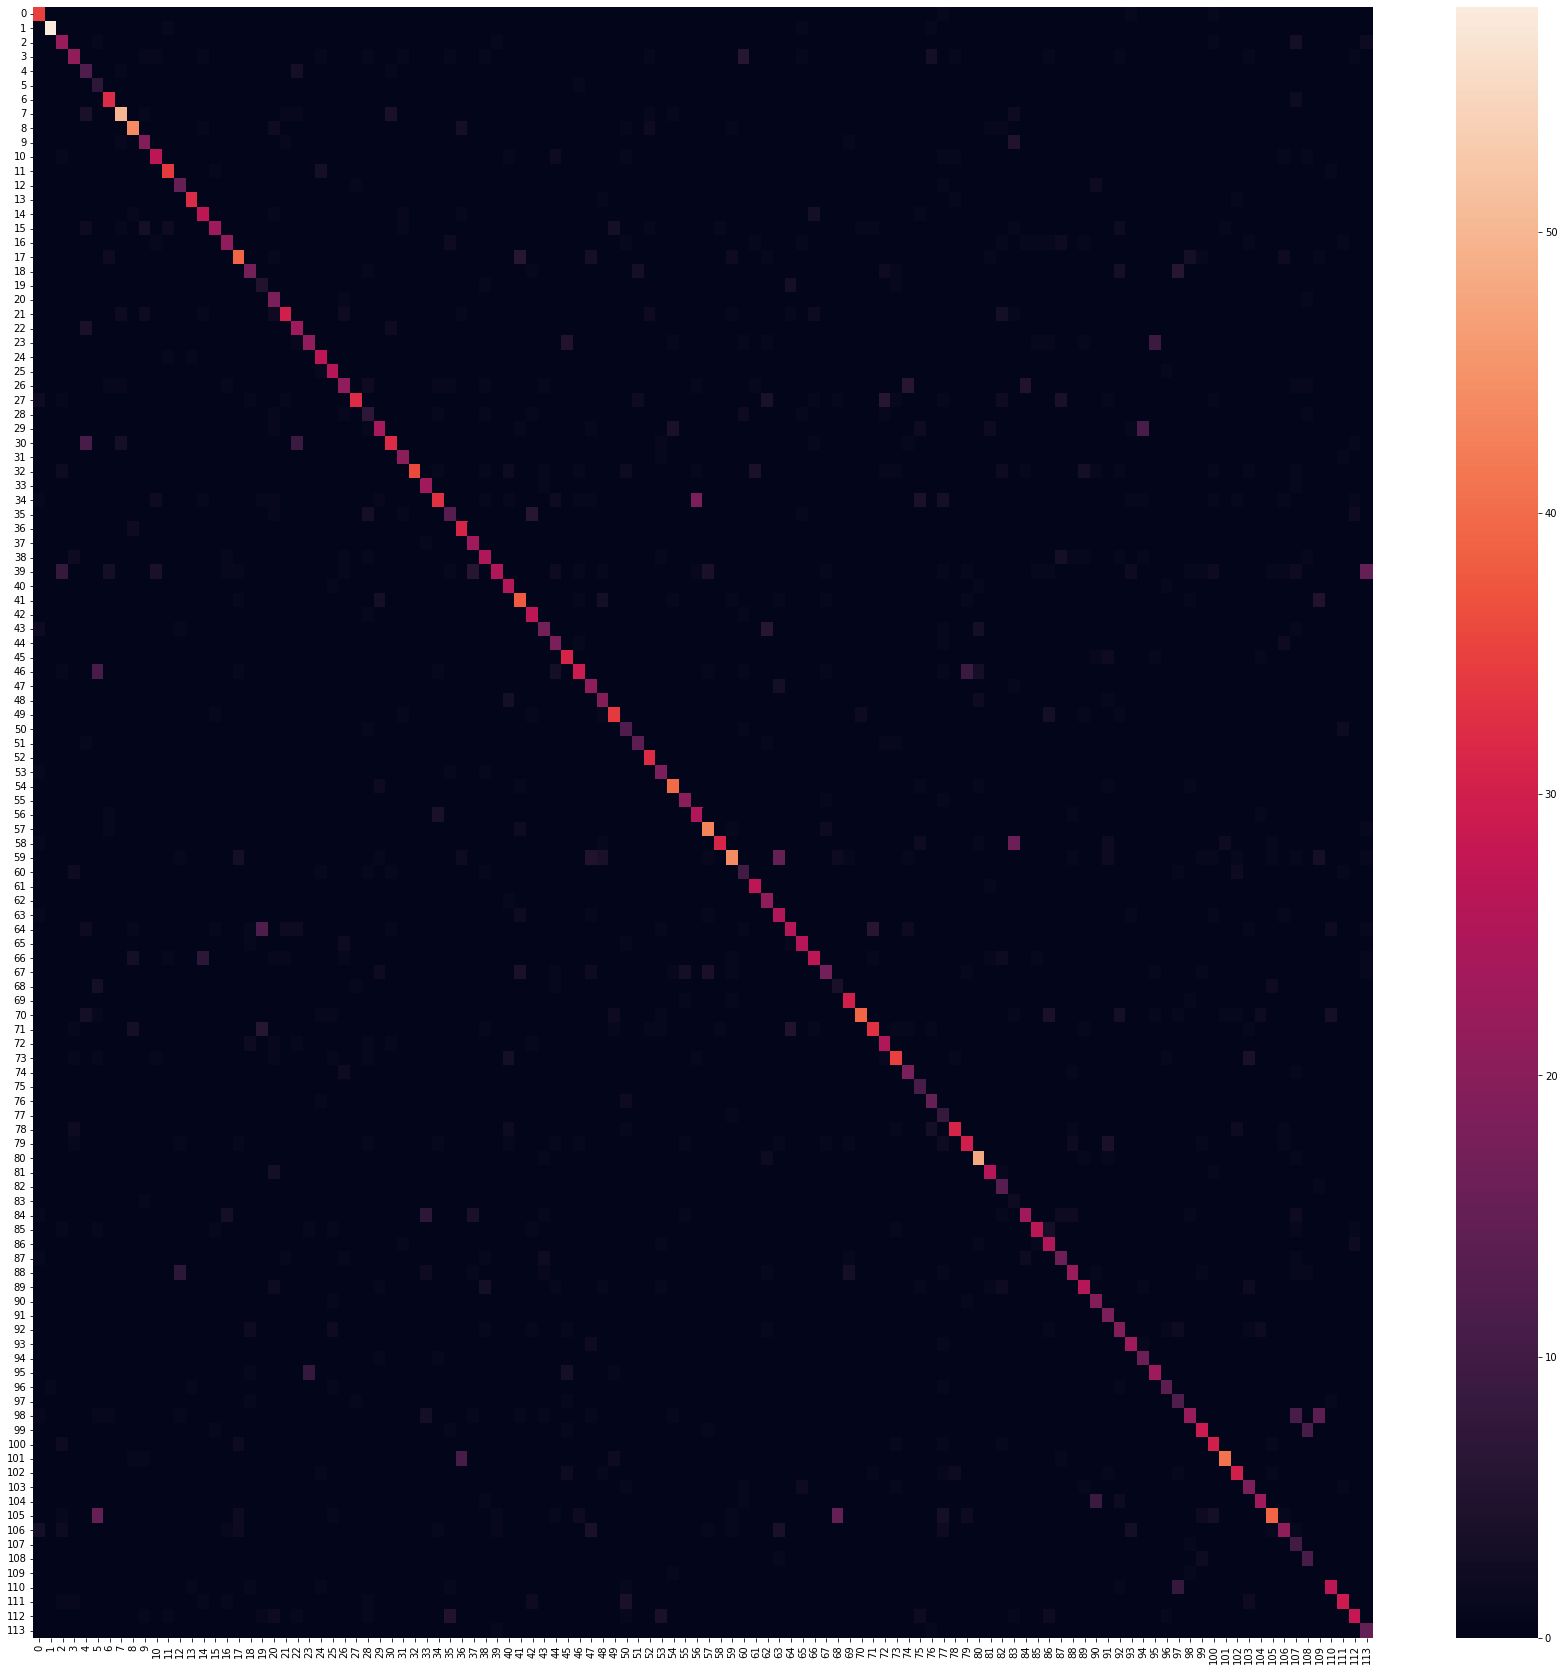

time: 4.26 s (started: 2022-02-21 18:53:10 +00:00)


In [ ]:
Thresold_finder(0.9, result, list_race)

 --- THRESHOLD :  0.75 ---

df Before :  (5853, 4)
df After :  (4699, 4)

Acc Général :  0.6277931474781868

                                precision    recall  f1-score   support

                  Afghan_hound       0.68      0.93      0.78        41
           African_hunting_dog       0.98      0.92      0.95        63
                      Airedale       0.49      0.69      0.57        35
American_Staffordshire_terrier       0.61      0.43      0.51        58
                   Appenzeller       0.27      0.60      0.37        20
            Australian_terrier       0.24      0.92      0.38        13
            Bedlington_terrier       0.71      0.94      0.81        36
          Bernese_mountain_dog       0.80      0.74      0.77        72
              Blenheim_spaniel       0.78      0.78      0.78        59
                 Border_collie       0.62      0.64      0.63        33
                Border_terrier       0.68      0.75      0.71        36
                   Boston_

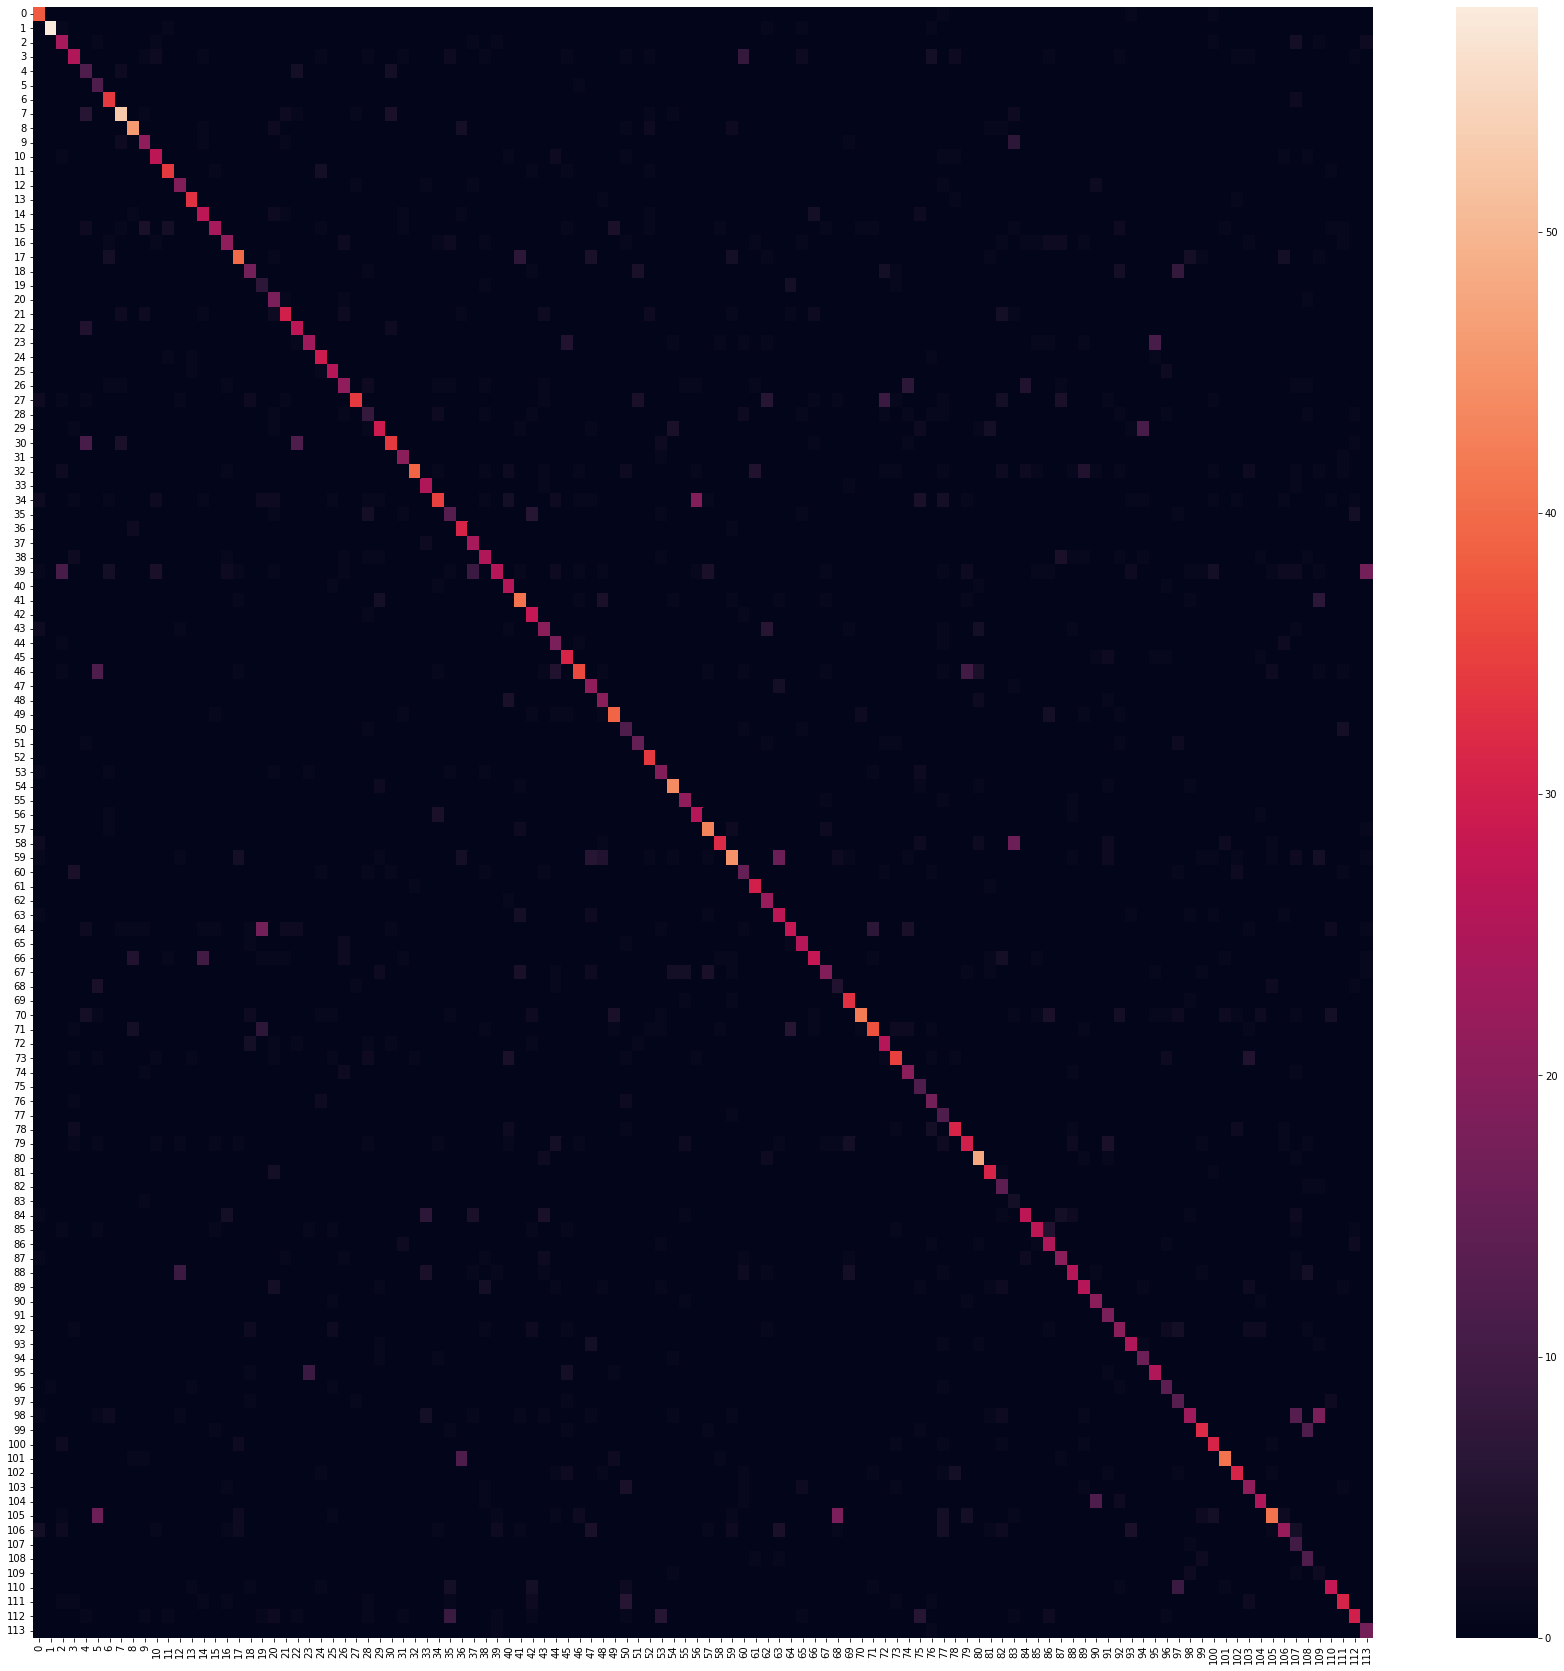

time: 3.97 s (started: 2022-02-21 18:53:14 +00:00)


In [ ]:
Thresold_finder(0.75, result, list_race)

 --- THRESHOLD :  0.5 ---

df Before :  (5853, 4)
df After :  (5392, 4)

Acc Général :  0.5816023738872403

                                precision    recall  f1-score   support

                  Afghan_hound       0.65      0.87      0.75        47
           African_hunting_dog       0.97      0.87      0.91        67
                      Airedale       0.42      0.66      0.51        38
American_Staffordshire_terrier       0.59      0.41      0.48        73
                   Appenzeller       0.24      0.57      0.34        21
            Australian_terrier       0.25      0.83      0.38        18
            Bedlington_terrier       0.66      0.95      0.78        39
          Bernese_mountain_dog       0.77      0.67      0.72        82
              Blenheim_spaniel       0.76      0.76      0.76        62
                 Border_collie       0.51      0.59      0.55        39
                Border_terrier       0.65      0.73      0.69        41
                   Boston_b

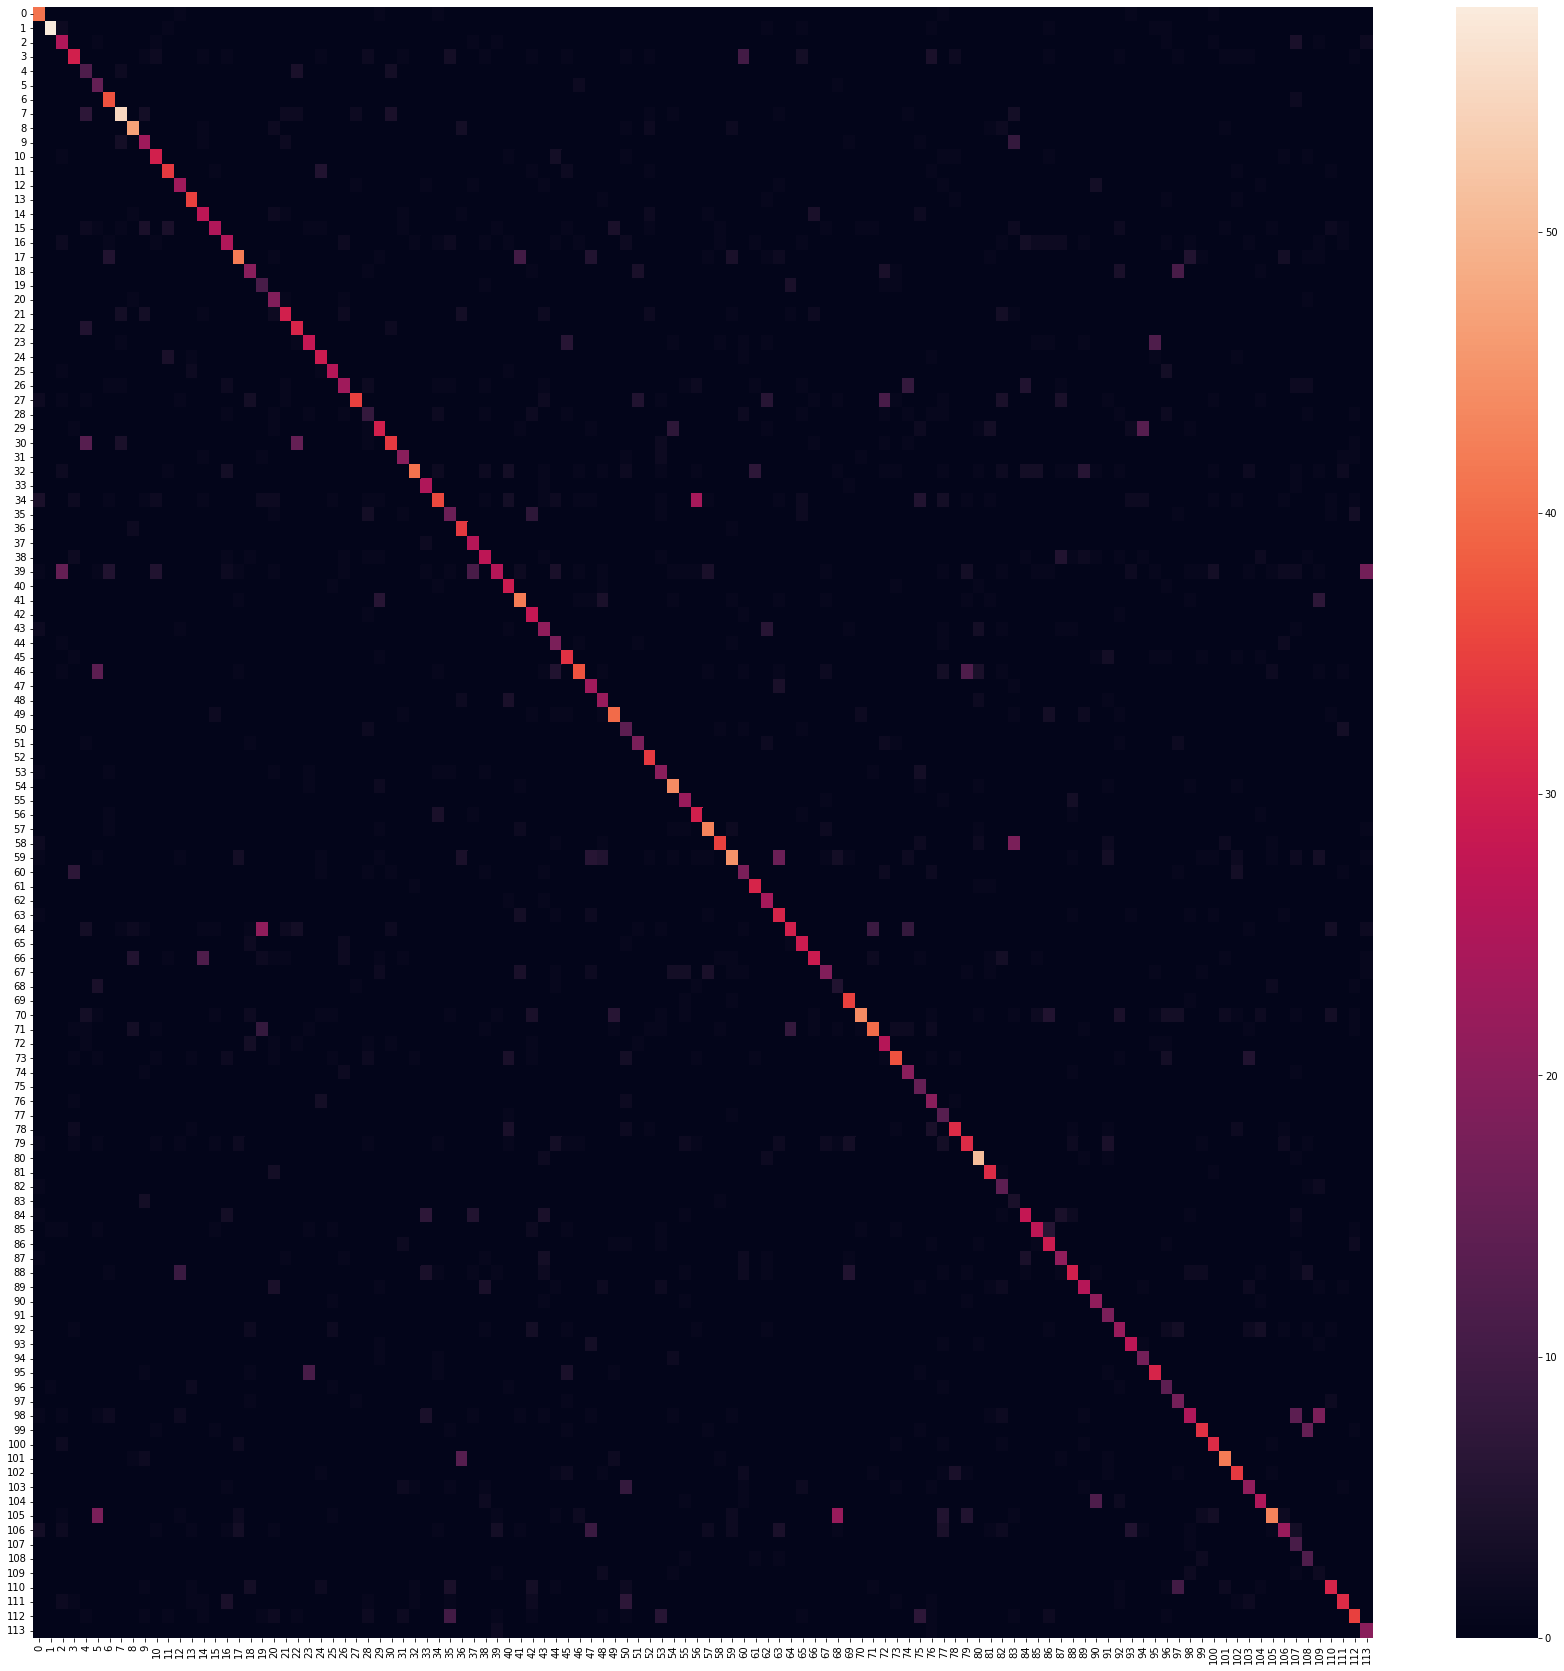

time: 5.54 s (started: 2022-02-21 18:53:00 +00:00)


In [ ]:
Thresold_finder(0.5, result, list_race)